In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv

In [3]:
path_to_hists = "E:/score/csv/" 
dt_file = ['LYAtt','LYDown','LYRayleigh','Recomb2','SCE','WireModdEdX','WireModThetaXZ','WireModThetaYZ_with_splines','WireModThetaYZ_without_splines','WireModX','WireModYZ','CV_sp']
dt_variaition = ['LYAtt','LYDown','LYRayleigh','Recomb2','SCE','WireModdEdX','WireModThetaXZ','WireModThetaYZ_with_splines','WireModThetaYZ_without_splines','WireModX','WireModYZ']
pot_exp_R1 = [2,2,2,2,2,2,2,2,2,2,2,2]
N_A=[144410,139739,144410,145376,145231,143782,144194,143759,144622,143993,144788,144610]
N_B=[144457,139878,144658,145748,145658,143876,144271,144631,144669,144058,144835,144652]
POT_MC=[3.64,3.57,3.69,3.72,3.71,3.67,3.68,3.69,3.69,3.67,3.70,3.69]
weight=(np.array(pot_exp_R1)/np.array(POT_MC))*(np.array(N_B)/np.array(N_A))
pot_005=1.50E+24


names=locals()

In [4]:
for var,w in zip(dt_file,weight):
    file_name="run1_numi_"+str(var)+"_score.csv"
    print("Opening file: ", file_name)
    data = pd.read_csv(path_to_hists+file_name,usecols=['bdt_score'],dtype=np.float64)
    dataL= data.to_numpy()
    names['bdt_' + str(var)] = dataL
    names['weight_' + str(var)] = w

signal = pd.read_csv('E:/score/csv/df_trident_0.05_score_test.csv',usecols=['bdt_score'],dtype=np.float64)
sign=signal.to_numpy()
bdt_dt=dataL

Opening file:  run1_numi_LYAtt_score.csv
Opening file:  run1_numi_LYDown_score.csv
Opening file:  run1_numi_LYRayleigh_score.csv
Opening file:  run1_numi_Recomb2_score.csv
Opening file:  run1_numi_SCE_score.csv
Opening file:  run1_numi_WireModdEdX_score.csv
Opening file:  run1_numi_WireModThetaXZ_score.csv
Opening file:  run1_numi_WireModThetaYZ_with_splines_score.csv
Opening file:  run1_numi_WireModThetaYZ_without_splines_score.csv
Opening file:  run1_numi_WireModX_score.csv
Opening file:  run1_numi_WireModYZ_score.csv
Opening file:  run1_numi_CV_sp_score.csv


C:\Users\steve\AppData\Local\Temp\ipykernel_15188\527508928.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[-0.5,-0.25,0,0.25,0.5], sharex=main_ax)


LYAtt = [-0.04392111 -0.24609446 -0.04647408 -0.01377176 -0.03039097]
LYDown = [-0.03818632 -0.14208506  0.06575635 -0.09898751 -0.0512976 ]
LYRayleigh = [-0.03120868 -0.23092005 -0.03373056 -0.00142648 -0.01784331]
Recomb2 = [ 0.01875051 -0.03560936 -0.21867837  0.08866377 -0.1245699 ]
SCE = [-0.01392634 -0.2881066   0.00275618  0.14818757 -0.11168164]
WireModdEdX = [-0.01796683 -0.02676927 -0.36271682  0.20372995 -0.08825863]
WireModThetaXZ = [-0.00669003  0.14330368 -0.19708314  0.08061858  0.01348044]
WireModThetaYZ_with_splines = [ 0.00918215  0.07804087 -0.13555083  0.18280895 -0.1871426 ]
WireModThetaYZ_without_splines = [ 0.01297706 -0.04170264 -0.3548855   0.22914004  0.04914749]
WireModX = [ 0.01401485  0.07818955 -0.33000217  0.20389098 -0.03858226]
WireModYZ = [ 0.01749884  0.02344637 -0.31905117  0.18966826 -0.01368107]


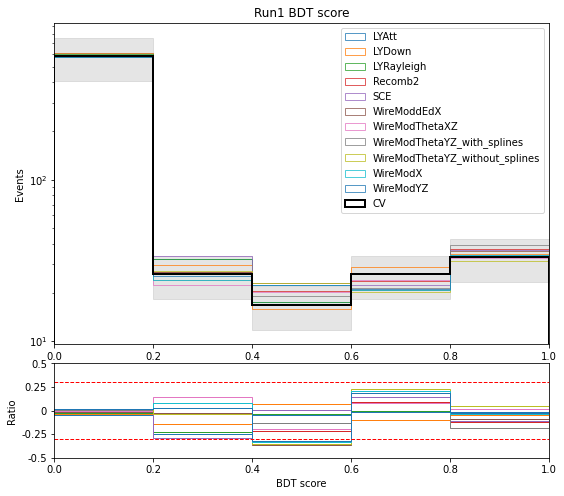

In [5]:
fig = plt.figure(figsize=(12, 8))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[-0.5,-0.25,0,0.25,0.5], sharex=main_ax)
#plt.yscale('log')
main_ax.set_title('Run1 BDT score')
plt.xlabel('BDT score')
main_ax.set_ylabel(r'Events')
x_hist.set_ylabel('Ratio')
plt.xlim(0,1)
#plt.ylim(0.1,100000.)
#plt.title('Run1 BDT score')
(counts_dt, bins_dt) = np.histogram(bdt_dt, bins=np.linspace(0,1,6))
(counts_std, bins_std) = np.histogram(names['bdt_' + 'CV_sp'], bins=np.linspace(0,1,6))
cv = (counts_std*weight_CV_sp)
error = np.zeros(5) 
for var in dt_variaition:
    (counts, bins) = np.histogram(names['bdt_' + str(var)], bins=np.linspace(0,1,6))
    main_ax.hist(bins[:-1], bins, weights=counts* names['weight_' + str(var)],alpha=0.75, histtype='step',label=str(var),log=True)
    vars=(counts*names['weight_' + str(var)])
    ratio = (cv-vars)/cv
    x_hist.hist(bins[:-1],bins,weights=ratio,histtype='step',orientation='vertical',label=str(var)) 
    print(var, '=',ratio)
x=[[0,0.2],[0.2,0.4],[0.4,0.6],[0.6,0.8],[0.8,1.0]]
w1=counts_std*weight_CV_sp*0.7
w2=counts_std*weight_CV_sp*1.3
main_ax.fill_between(x[0], w1[0], w2[0], alpha=0.2,interpolate=False,color='grey')
main_ax.fill_between(x[1], w1[1], w2[1], alpha=0.2,interpolate=False,color='grey')
main_ax.fill_between(x[2], w1[2], w2[2], alpha=0.2,interpolate=False,color='grey')
main_ax.fill_between(x[3], w1[3], w2[3], alpha=0.2,interpolate=False,color='grey')
main_ax.fill_between(x[4], w1[4], w2[4], alpha=0.2,interpolate=False,color='grey')
main_ax.hist(bins_std[:-1], bins_std , weights= counts_std*weight_CV_sp,histtype='step',lw=2,label='CV',color='black',log=True)
x_hist.axhline(y=0.3,ls='--',c='r',lw=1)
x_hist.axhline(y=-0.3,ls='--',c='r',lw=1)
x_hist.set_ylim(-0.5,0.5)
#x_hist.set_yticklabels(-0.5,0.5)
main_ax.legend()
plt.show()

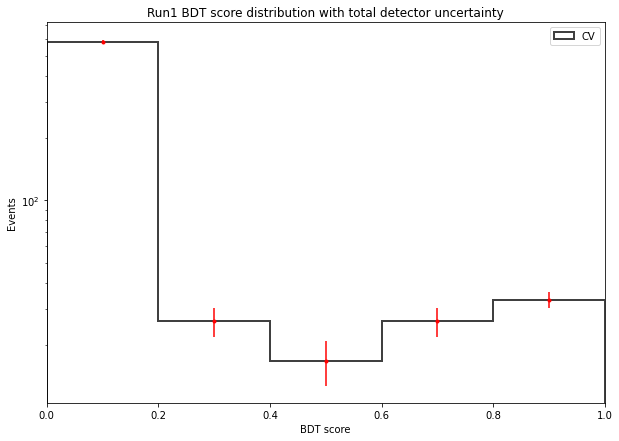

In [14]:
plt.figure(figsize=(10,7))
plt.yscale('log')
plt.xlabel('BDT score')
plt.ylabel(r'Events')
plt.xlim(0.,1)
#plt.ylim(0.1,10000.)
plt.title('Run1 BDT score distribution with total detector uncertainty')
(counts_std, bins_std) = np.histogram(names['bdt_' + 'CV_sp'], bins=np.linspace(0,1,6))
cv = (counts_std*weight_CV_sp)
error = np.zeros(5) 
for var in dt_variaition:
    (counts, bins) = np.histogram(names['bdt_' + str(var)], bins=np.linspace(0,1,6))
    vars=(counts*names['weight_' + str(var)])
    div=np.square(cv-vars)
    ra=(cv-vars)/cv
    #print('uncertainty of ',var,'=',ra)
    error=div+error
err=np.sqrt(error/10)
plt.hist(bins_std[:-1], bins_std, weights=weight_CV_sp * counts_std ,alpha=0.75, histtype='step',label='CV',color='k',lw=2)
plt.errorbar(0.5*(bins_std[:-1]+bins_std[1:]), weight_CV_sp * counts_std, yerr=err, fmt='r.')
plt.legend()
plt.show()

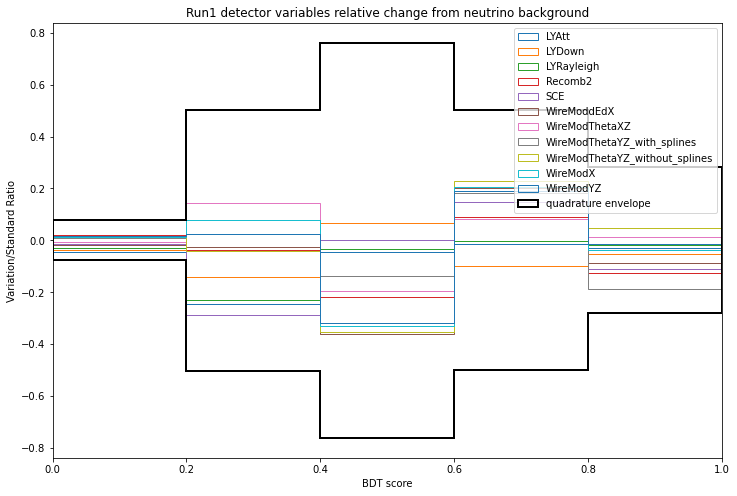

In [6]:
plt.figure(figsize=(12,8))
plt.xlabel('BDT score')
plt.ylabel(r'Variation/Standard Ratio')
plt.xlim(0,1)
plt.title('Run1 detector variables relative change from neutrino background')
(counts_sd, bins_sd) = np.histogram(names['bdt_' + 'CV_sp'], bins=5, range = (0., 1.))
error = np.zeros(5) 
cv = (counts_sd*names['weight_' + 'CV_sp'])
for var in dt_variaition:
    (counts, bins) = np.histogram(names['bdt_' + str(var)], bins=5, range = (0., 1.))
    vars=(counts*names['weight_' + str(var)])
    ratio = (cv-vars)/cv
    plt.hist(bins[:-1],bins,weights=ratio,histtype='step',label=str(var)) 
    error=ratio**2+error
err=np.sqrt(error)
plt.hist(bins[:-1],bins,weights=err,histtype='step',color='black',label='quadrature envelope',lw=2) 
plt.hist(bins[:-1],bins,weights=-err,histtype='step',color='black',lw=2) 
plt.legend()
plt.show()